In [2]:
import psycopg2
import configparser

config = configparser.ConfigParser()

# AWS credentials
config.read('/home/gari/.aws/credentials')
KEY      = config.get('credentials','KEY')
SECRET   = config.get('credentials','SECRET')


DWH_CLUSTER_IDENTIFIER = config.get("DWH","DWH_CLUSTER_IDENTIFIER")
DWH_DB                 = config.get("DWH","DWH_DB")
DWH_DB_USER            = config.get("DWH","DWH_DB_USER")
DWH_DB_PASSWORD        = config.get("DWH","DWH_DB_PASSWORD")
DWH_PORT               = config.get("DWH","DWH_PORT")
DWH_IAM_ROLE_NAME      = config.get("DWH", "DWH_IAM_ROLE_NAME")

In [3]:
conn = psycopg2.connect(
    dbname=DWH_DB, 
    host='dwhcluster.crh9wevfd8it.us-west-2.redshift.amazonaws.com', 
    port= DWH_PORT,
    user= DWH_DB_USER, 
    password= DWH_DB_PASSWORD)

In [4]:
cur = conn.cursor()
#cur.execute('select year,count (distinct id) from versions group by year')

In [4]:
results = cur.fetchall()

In [25]:
import pandas as pd
df = pd.DataFrame(results,
                  columns=('year','total')).astype({'year': 'int32'}).\
                  sort_values(by='year').set_index('year')

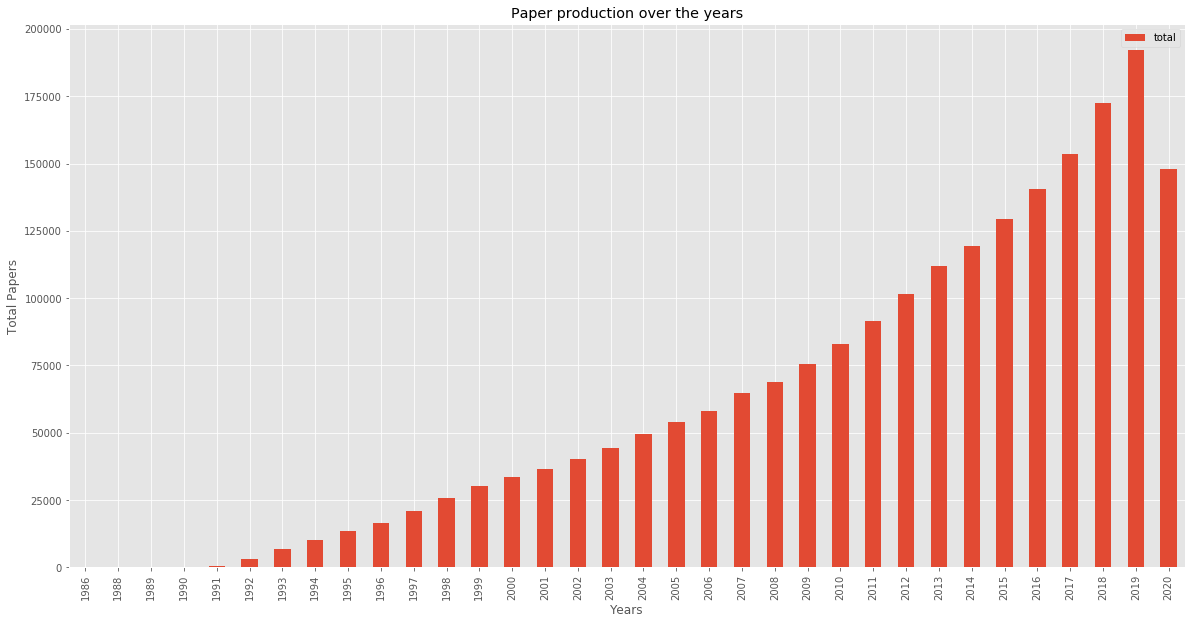

In [30]:
df.plot(kind='bar',figsize=(20, 10))
plt.title('Paper production over the years')
plt.ylabel('Total Papers')
plt.xlabel('Years')
plt.show()

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use(['ggplot'])

In [35]:
cur.execute("""
select year,category, count(a.id) as count_id from 
(select id, category from categories) a 
left join 
(select id, max(year) as year from versions group by id) b
on a.id=b.id
where year>2000
group by year,category
""")

In [44]:
cur.execute('ABORT')

In [36]:
results = cur.fetchall()

In [37]:
import pandas as pd
df2 = pd.DataFrame(results,
                  columns=('year','category','total')).astype({'year': 'int32'},{'total': 'int32'}).\
                  sort_values(by='year').set_index('year')
macro_cat=df2['category'].str.split(' ',n=1,expand=True).rename(columns={0:'macro_category'})

,category,total
year,,
2001,math ac,79
2001,cs pl,60
2001,cs dl,9
2001,cs cr,16
2001,math gr,141
2001,cs oh,11
2001,physics bio ph,140
2001,math co,279
2001,physics flu dyn,130


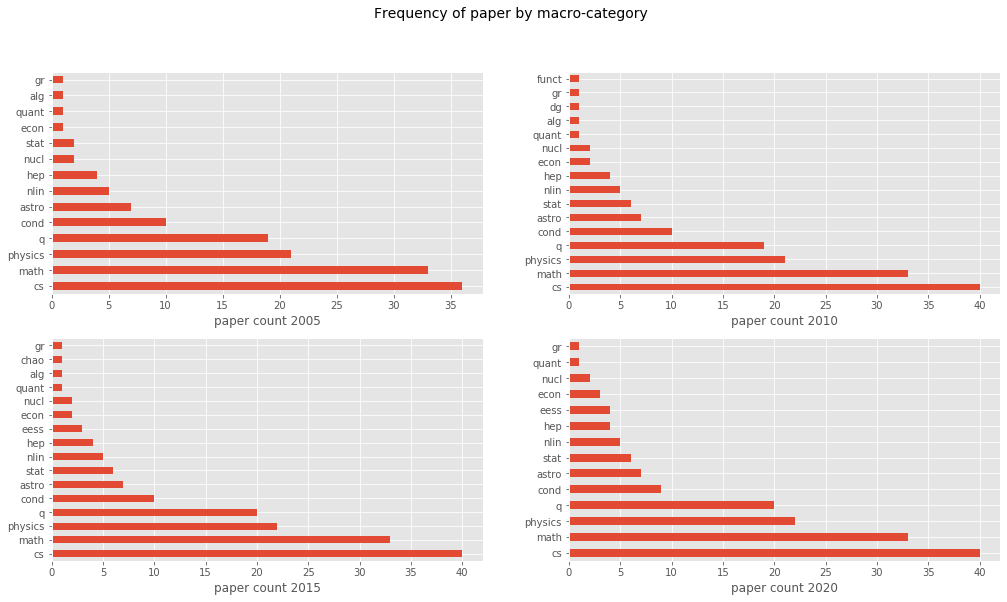

In [42]:
#df_latest_years=df2.loc[df2.index > 2018]
fig=plt.figure(figsize=(17,9))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

fig.suptitle("Frequency of paper by macro-category", fontsize=14)

for year,ax in zip([2005,2010,2015,2020],[ax1,ax2,ax3,ax4]):
    df_temp=macro_cat.loc[macro_cat.index==year]
    #print(len(df_temp))
    df_temp["macro_category"].value_counts().plot(kind="barh",ax=ax)
    ax.set_xlabel("paper count "+ str(year))
plt.show()


In [33]:
macro_cat.loc[macro_cat.index==2018].describe()

,macro_category,1
count,157,157
unique,15,136
top,cs,th
freq,40,4


In [34]:
macro_cat.loc[macro_cat.index==2019].describe()

,macro_category,1
count,158,158
unique,15,137
top,cs,ph
freq,40,4


In [25]:
for label, df in df_temp.groupby("macro_category"):
    df.Age.plot(kind="kde", ax=ax3, label=label)

AttributeError: 'DataFrame' object has no attribute 'Age'

In [ ]:
df2['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,    
                            pctdistance=1.12 
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

In [45]:
from tika import parser # pip install tika

raw = parser.from_file('/home/gari/Desktop/0704.0001.pdf')
print(raw['content'])

2020-09-21 13:56:26,873 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar.md5 to /tmp/tika-server.jar.md5.
2020-09-21 13:57:40,193 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server/1.24/tika-server-1.24.jar to /tmp/tika-server.jar.
2020-09-21 14:01:13,589 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...

























































ar
X

iv
:0

70
4.

00
01

v2
  [

he
p-

ph
] 

 2
4 

Ju
l 

20
07

ANL-HEP-PR-07-12, arXiv:0704.0001

tions at

Tevatron and LHC energies

C. Balázs

1
,

∗
E. L. Berger

1
,

†
P. Nadolsky

1
,

‡
and C.-P. Yuan

2§

1
s Division, Argonne National Laboratory, Argonne, IL 60439

2
s and Astronomy,

higan State University, East Lansing, MI 48824

(Dated: May 3, 2007)

t

s is presented for the

olliders. All next-to-leading order perturbative

luded,

as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to-leading

ulation is most reliable.

tions are made

tions are shown for distributions of diphoton

ed at the energy of the Large Hadron Collider (LHC). Distributions of the diphoton

esses at

tion

of events.

PACS numbers: 12.15.Ji, 12.38 Cy, 13.85.Qk

ollider phenomenology; Higgs boson; LHC

∗
s, Monash University, Melbourne VIC 3800, Australia

†
berger�anl.gov

‡
nadolsky�hep.anl.gov

§


In [46]:
raw

{'metadata': {'Author': '',
  'Content-Type': 'application/pdf',
  'Creation-Date': '2018-10-24T01:32:59Z',
  'Keywords': '',
  'Last-Modified': '2018-10-24T01:32:59Z',
  'Last-Save-Date': '2018-10-24T01:32:59Z',
  'X-Parsed-By': ['org.apache.tika.parser.DefaultParser',
   'org.apache.tika.parser.pdf.PDFParser'],
  'X-TIKA:content_handler': 'ToTextContentHandler',
  'X-TIKA:embedded_depth': '0',
  'X-TIKA:parse_time_millis': '1839',
  'access_permission:assemble_document': 'true',
  'access_permission:can_modify': 'true',
  'access_permission:can_print': 'true',
  'access_permission:can_print_degraded': 'true',
  'access_permission:extract_content': 'true',
  'access_permission:extract_for_accessibility': 'true',
  'access_permission:fill_in_form': 'true',
  'access_permission:modify_annotations': 'true',
  'cp:subject': '',
  'created': '2018-10-24T01:32:59Z',
  'creator': '',
  'date': '2018-10-24T01:32:59Z',
  'dc:creator': '',
  'dc:format': 'application/pdf; version=1.4',
  'dc:su